In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# data visualization settings

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
# load the data

customers = pd.read_csv('datasets/E-commerce.csv')

In [19]:
# overview of data

print(customers.head())
print(customers.info())
print(customers.describe())

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [20]:
# check for missing values

customers.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [23]:
# drop rows with missing values

customers.dropna(inplace=True)

In [24]:
customers.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [26]:
# map satisfaction level(target) into binary

customers['satisfaction_binary'] = customers['Satisfaction Level'].map(lambda x: 1 if x == 'Satisfied' else 0)

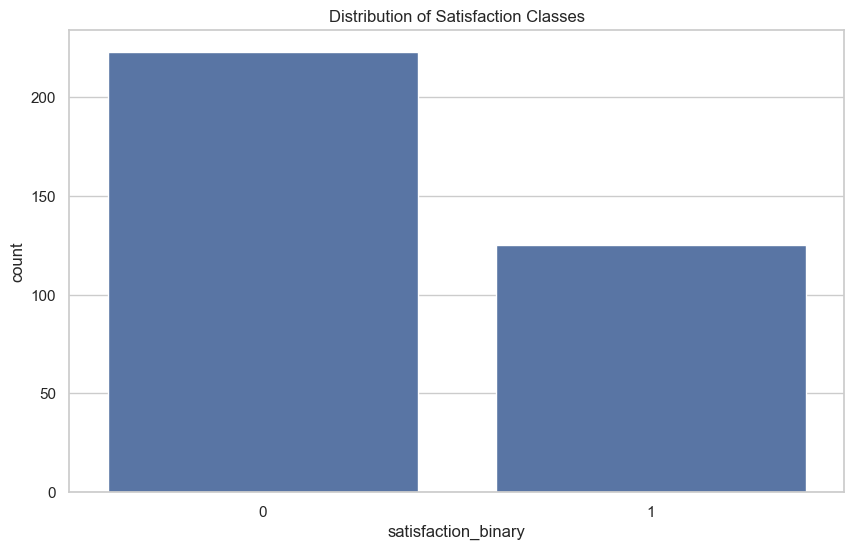

In [27]:
# plot count of satisfaction classes

sns.countplot(x='satisfaction_binary', data=customers)
plt.title('Distribution of Satisfaction Classes')
plt.show()

In [28]:
# seperate features(X) and target(y)

X = customers.drop(columns=["Customer ID", "Satisfaction Level", "satisfaction_binary"])
y = customers["satisfaction_binary"]

In [36]:
# encode categorical data

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

ordinal_cols = ['Membership Type']
nominal_cols = ['City']
binary_cols = ['Gender', 'City']

# map binary columns to encode
customers['Gender'] = customers['Gender'].map({'Male': 0, 'Female': 1})
customers['Discount Applied'] = customers['Discount Applied'].map({False: 0, True: 1})

# Define the order for ordinal category(membership type)
membership_order = [['Bronze', 'Silver', 'Gold']]

column_transformer = ColumnTransformer(
    transformers=[
        ("nominal", OneHotEncoder(drop='first'), nominal_cols),
        ("ordinal", OrdinalEncoder(categories=membership_order), ordinal_cols),
        ("binary", OrdinalEncoder(), binary_cols)
    ],
    remainder = 'passthrough'
)

In [37]:
# seperate the dataset into trainig set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# make the pipeline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
                   ("preprocessor", column_transformer),
                   ("model", LogisticRegression(max_iter=500))
])

In [46]:
# fit the training set into the pipeline

pipeline.fit(X_train, y_train)

/Users/veraezeagu/PycharmProjects/logistic_regression/.venv/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['City']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Bronze',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Membership Type']),
                                                 ('binary', OrdinalEncoder(),
                                                  ['Gender', 'City'])])),
                ('model', LogisticRegression(max_iter=500))])

In [47]:
# predict the new target using pipeline

y_pred = pipeline.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0])

In [48]:
# evaluate model accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9857142857142858
Confusion Matrix:
 [[43  1]
 [ 0 26]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.96      1.00      0.98        26

    accuracy                           0.99        70
   macro avg       0.98      0.99      0.98        70
weighted avg       0.99      0.99      0.99        70



In [51]:
# See which features went into the model
feature_names = column_transformer.get_feature_names_out()
print(feature_names)

['nominal__City_Houston' 'nominal__City_Los Angeles' 'nominal__City_Miami'
 'nominal__City_New York' 'nominal__City_San Francisco'
 'ordinal__Membership Type' 'binary__Gender' 'binary__City'
 'remainder__Age' 'remainder__Total Spend' 'remainder__Items Purchased'
 'remainder__Average Rating' 'remainder__Discount Applied'
 'remainder__Days Since Last Purchase']
